# Building a regression model for predicting house sale prices

In [1038]:
import pickle
import pathlib
import numpy as np
import pandas as pd

In [1039]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

c:\Users\leona\Insper\Machine Learning\ames\data


In [1040]:
clean_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'

Loading the dataset

In [1041]:
with open(clean_data_path, 'rb') as file:
    data = pickle.load(file)

In [1042]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MS.SubClass      2877 non-null   category
 1   MS.Zoning        2877 non-null   category
 2   Lot.Frontage     2877 non-null   float64 
 3   Lot.Area         2877 non-null   float64 
 4   Lot.Shape        2877 non-null   category
 5   Land.Contour     2877 non-null   category
 6   Lot.Config       2877 non-null   category
 7   Land.Slope       2877 non-null   category
 8   Neighborhood     2877 non-null   category
 9   Bldg.Type        2877 non-null   category
 10  House.Style      2877 non-null   category
 11  Overall.Qual     2877 non-null   category
 12  Overall.Cond     2877 non-null   category
 13  Roof.Style       2877 non-null   category
 14  Mas.Vnr.Type     2877 non-null   category
 15  Mas.Vnr.Area     2877 non-null   float64 
 16  Exter.Qual       2877 non-null   category
 17  

In [1043]:
model_data = data.copy()

In [1044]:
len(model_data.columns)

70

## Encoding categorical variables

Lets identify all categorical variables - both nominal (that is, categoricals without category order) and ordinal.

In [1045]:
categorical_columns = []
ordinal_columns = []
for col in model_data.select_dtypes('category').columns:
    if model_data[col].cat.ordered:
        ordinal_columns.append(col)
    else:
        categorical_columns.append(col)

In [1046]:
ordinal_columns

['Lot.Shape',
 'Land.Slope',
 'Overall.Qual',
 'Overall.Cond',
 'Exter.Qual',
 'Exter.Cond',
 'Heating.QC',
 'Electrical',
 'Kitchen.Qual',
 'Functional',
 'Paved.Drive',
 'Fence']

In [1047]:
categorical_columns

['MS.SubClass',
 'MS.Zoning',
 'Land.Contour',
 'Lot.Config',
 'Neighborhood',
 'Bldg.Type',
 'House.Style',
 'Roof.Style',
 'Mas.Vnr.Type',
 'Foundation',
 'Bsmt.Qual',
 'Bsmt.Cond',
 'Bsmt.Exposure',
 'BsmtFin.Type.1',
 'BsmtFin.Type.2',
 'Central.Air',
 'Garage.Type',
 'Garage.Finish',
 'Sale.Type',
 'Sale.Condition',
 'Condition',
 'Exterior']

In [1048]:
model_data['Bsmt.Cond']

0       Gd
1       TA
2       TA
3       TA
4       TA
        ..
2925    TA
2926    TA
2927    TA
2928    TA
2929    TA
Name: Bsmt.Cond, Length: 2877, dtype: category
Categories (4, object): ['Gd', 'TA', 'Fa', 'NA']

### Encoding ordinal variables 

Ordinal variables can be transformed into integer numbers in a straightforward manner: the lowest category is assigned the value "zero", the next category is given the value "one", etc. The `Pandas` library has a function for this task: `factorize()`:

In [1049]:
for col in ordinal_columns:
    codes, _ = pd.factorize(data[col], sort=True)
    model_data[col] = codes

Lets confirm that the variables are no longer ordinal, but now are integers:

In [1050]:
model_data[ordinal_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Lot.Shape     2877 non-null   int64
 1   Land.Slope    2877 non-null   int64
 2   Overall.Qual  2877 non-null   int64
 3   Overall.Cond  2877 non-null   int64
 4   Exter.Qual    2877 non-null   int64
 5   Exter.Cond    2877 non-null   int64
 6   Heating.QC    2877 non-null   int64
 7   Electrical    2877 non-null   int64
 8   Kitchen.Qual  2877 non-null   int64
 9   Functional    2877 non-null   int64
 10  Paved.Drive   2877 non-null   int64
 11  Fence         2877 non-null   int64
dtypes: int64(12)
memory usage: 292.2 KB


Compare the original values with the encoded values:

In [1051]:
data['Lot.Shape'].value_counts()

Lot.Shape
Reg    1825
IR1     960
IR2      76
IR3      16
Name: count, dtype: int64

In [1052]:
model_data['Lot.Shape'].value_counts()

Lot.Shape
0    1825
1     960
2      76
3      16
Name: count, dtype: int64

### Encoding nominal variables

With nominal variables there is no notion of order among categories. Therefore, it would be a conceptual mistake to encode them in the same manner as the ordinal variables. For instance, consider the `Exterior` variable:

In [1053]:
model_data['Exterior'].value_counts()

Exterior
VinylSd    1024
HdBoard     439
MetalSd     432
Wd Sdng     401
Plywood     218
CemntBd     126
BrkFace      86
WdShing      55
Stucco       42
AsbShng      41
Other        13
Name: count, dtype: int64

In [1054]:
original_data = model_data['Exterior']
encoded_data = pd.get_dummies(original_data)

aux_dataframe = encoded_data
aux_dataframe['Exterior'] = original_data.copy()

aux_dataframe.head().transpose()

,0,1,2,3,4
AsbShng,False,False,False,False,False
BrkFace,True,False,False,True,False
CemntBd,False,False,False,False,False
HdBoard,False,False,False,False,False
MetalSd,False,False,False,False,False
Plywood,False,False,False,False,False
Stucco,False,False,False,False,False
VinylSd,False,True,False,False,True
Wd Sdng,False,False,True,False,False
WdShing,False,False,False,False,False


In [1055]:
original_data = model_data['Exterior']
encoded_data = pd.get_dummies(original_data, drop_first=True)

aux_dataframe = encoded_data
aux_dataframe['Exterior'] = original_data.copy()

aux_dataframe.head().transpose()

,0,1,2,3,4
BrkFace,True,False,False,True,False
CemntBd,False,False,False,False,False
HdBoard,False,False,False,False,False
MetalSd,False,False,False,False,False
Plywood,False,False,False,False,False
Stucco,False,False,False,False,False
VinylSd,False,True,False,False,True
Wd Sdng,False,False,True,False,False
WdShing,False,False,False,False,False
Other,False,False,False,False,False


In [1056]:
model_data = pd.get_dummies(model_data, drop_first=True)

In [1057]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Columns: 165 entries, Lot.Frontage to Exterior_Other
dtypes: bool(119), float64(34), int64(12)
memory usage: 1.4 MB


In [1058]:
for cat in categorical_columns:
    dummies = []
    for col in model_data.columns:
        if col.startswith(cat + "_"):
            dummies.append(f'"{col}"')
    dummies_str = ', '.join(dummies)
    print(f'From column "{cat}" we made {dummies_str}\n')

From column "MS.SubClass" we made "MS.SubClass_30", "MS.SubClass_50", "MS.SubClass_60", "MS.SubClass_70", "MS.SubClass_80", "MS.SubClass_85", "MS.SubClass_90", "MS.SubClass_120", "MS.SubClass_160", "MS.SubClass_190", "MS.SubClass_Other"

From column "MS.Zoning" we made "MS.Zoning_RH", "MS.Zoning_RL", "MS.Zoning_RM"

From column "Land.Contour" we made "Land.Contour_HLS", "Land.Contour_Low", "Land.Contour_Lvl"

From column "Lot.Config" we made "Lot.Config_CulDSac", "Lot.Config_FR2", "Lot.Config_FR3", "Lot.Config_Inside"

From column "Neighborhood" we made "Neighborhood_BrDale", "Neighborhood_BrkSide", "Neighborhood_ClearCr", "Neighborhood_CollgCr", "Neighborhood_Crawfor", "Neighborhood_Edwards", "Neighborhood_Gilbert", "Neighborhood_IDOTRR", "Neighborhood_MeadowV", "Neighborhood_Mitchel", "Neighborhood_NAmes", "Neighborhood_NPkVill", "Neighborhood_NWAmes", "Neighborhood_NoRidge", "Neighborhood_NridgHt", "Neighborhood_OldTown", "Neighborhood_SWISU", "Neighborhood_Sawyer", "Neighborhood_Sa

In [1059]:
for col in model_data:
    print(col)

Lot.Frontage
Lot.Area
Lot.Shape
Land.Slope
Overall.Qual
Overall.Cond
Mas.Vnr.Area
Exter.Qual
Exter.Cond
BsmtFin.SF.1
BsmtFin.SF.2
Bsmt.Unf.SF
Total.Bsmt.SF
Heating.QC
Electrical
X1st.Flr.SF
X2nd.Flr.SF
Low.Qual.Fin.SF
Gr.Liv.Area
Bsmt.Full.Bath
Bsmt.Half.Bath
Full.Bath
Half.Bath
Bedroom.AbvGr
Kitchen.AbvGr
Kitchen.Qual
TotRms.AbvGrd
Functional
Fireplaces
Garage.Cars
Garage.Area
Paved.Drive
Wood.Deck.SF
Open.Porch.SF
Enclosed.Porch
X3Ssn.Porch
Screen.Porch
Pool.Area
Fence
Misc.Val
Mo.Sold
Yr.Sold
SalePrice
HasShed
HasAlley
Garage.Age
Remod.Age
House.Age
MS.SubClass_30
MS.SubClass_50
MS.SubClass_60
MS.SubClass_70
MS.SubClass_80
MS.SubClass_85
MS.SubClass_90
MS.SubClass_120
MS.SubClass_160
MS.SubClass_190
MS.SubClass_Other
MS.Zoning_RH
MS.Zoning_RL
MS.Zoning_RM
Land.Contour_HLS
Land.Contour_Low
Land.Contour_Lvl
Lot.Config_CulDSac
Lot.Config_FR2
Lot.Config_FR3
Lot.Config_Inside
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborh

In [1060]:
len(model_data.columns)

165

In [1061]:
model_data['SalePrice']

0       5.332438
1       5.021189
2       5.235528
3       5.387390
4       5.278525
          ...   
2925    5.153815
2926    5.117271
2927    5.120574
2928    5.230449
2929    5.274158
Name: SalePrice, Length: 2877, dtype: float64

For this project, we are going to select 4 different regression models and compare their performance:
- Linear Regression
- Lasso Regression
- Ridge Regression
- Elastic Net Regression

Let's start by analysing the performance of those models with the original dataset, that is, without any feature engineering.

In [1062]:
from sklearn.model_selection import train_test_split

X = model_data.drop('SalePrice', axis=1)
y = model_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [1063]:
def error_percent(rmse):
    return f"{100 * (10**rmse - 1):.2f}%"

In [1064]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'{name}: {error_percent(rmse)}')



Linear Regression: 5944353858294059630592.00%
Ridge Regression: 15.10%
Lasso Regression: 27.56%
Elastic Net Regression: 25.21%


# Removing Outliers

## Outiliers detection Gr.Liv.Area

In [1065]:
len(model_data[model_data['Gr.Liv.Area'] > 3000])

25

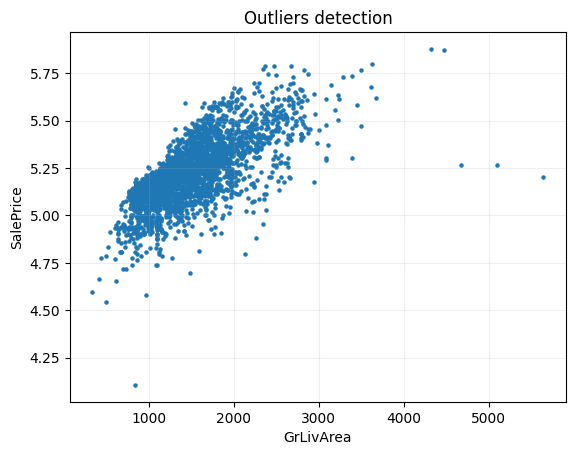

In [1066]:
import matplotlib.pyplot as plt

plt.scatter(model_data['Gr.Liv.Area'], model_data['SalePrice'], s=5)
plt.title("Outliers detection")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.grid(alpha=0.2)
plt.show()



As suggested by Dean De Cock in the article of the Ames dataset https://jse.amstat.org/v19n3/decock.pdf, we will remove houses with more than 4000 square feet from the data set. This are the 5 house with strange observations.

In [1067]:
model_data = model_data[model_data['Gr.Liv.Area'] < 4000] 

We saw an opportunity to remove the lowest sale registred in the dataset as well, because it was the only observation of a sell bellow 4.50 and without any other observation near this price.

In [1068]:

model_data = model_data[model_data['SalePrice'] > 4.5]

The result was a visualization where the datapoints appeared more clustered

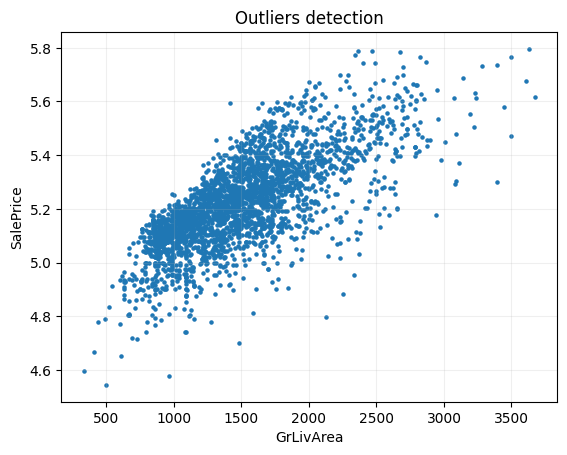

In [1069]:
import matplotlib.pyplot as plt

plt.scatter(model_data['Gr.Liv.Area'], model_data['SalePrice'], s=5)
plt.title("Outliers detection")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.grid(alpha=0.2)
plt.show()


We will make the same outlier detection for the 5 features that have the biggest positive correlation to the target,
and for the 5 features that have the biggest negative correlation to the target.

In [1070]:
corr = model_data.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice[0:6])

SalePrice        1.000000
Overall.Qual     0.828291
Gr.Liv.Area      0.721495
Garage.Cars      0.688382
Garage.Area      0.670960
Total.Bsmt.SF    0.651745
Name: SalePrice, dtype: float64


## Outiliers detection Overall.Qual

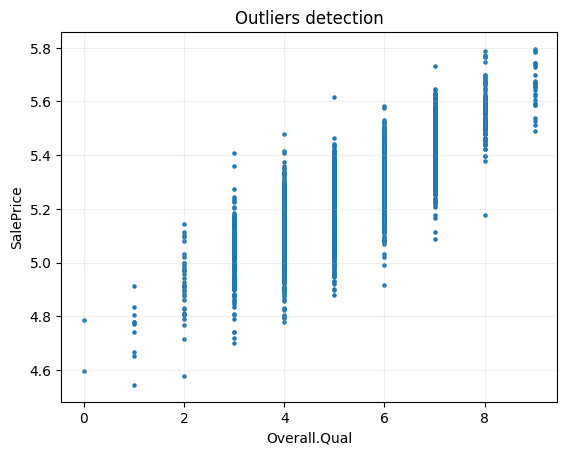

In [1071]:
import matplotlib.pyplot as plt

plt.scatter(model_data['Overall.Qual'], model_data['SalePrice'], s=5)
plt.title("Outliers detection")
plt.xlabel("Overall.Qual")
plt.ylabel("SalePrice")
plt.grid(alpha=0.2)
plt.show()


Only two observations with Overall Quality 0

In [1072]:
model_data = model_data[model_data['Overall.Qual'] > 0]

## Outiliers detection Garage.Cars 

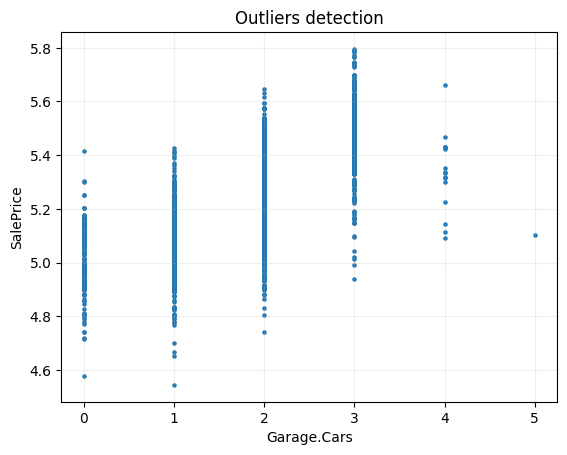

In [1073]:
import matplotlib.pyplot as plt

plt.scatter(model_data['Garage.Cars'], model_data['SalePrice'], s=5)
plt.title("Outliers detection")
plt.xlabel("Garage.Cars")
plt.ylabel("SalePrice")
plt.grid(alpha=0.2)
plt.show()


Only one observation of a garage with capacity for 5 cars, so we will remove this due the lack of enough observations at this rate

In [1074]:
model_data = model_data[model_data['Garage.Cars'] < 5]


## Outiliers detection Garage.Area

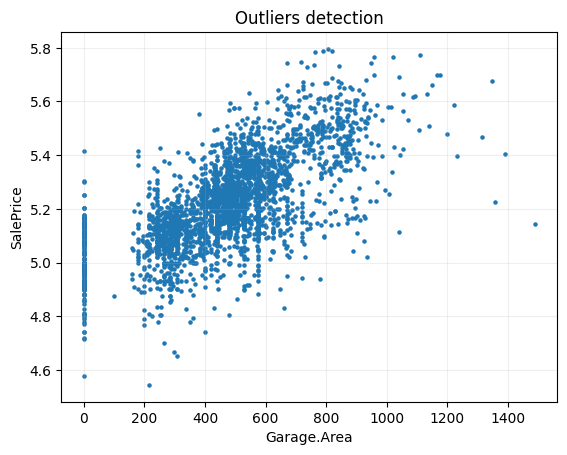

In [1075]:
import matplotlib.pyplot as plt

plt.scatter(model_data['Garage.Area'], model_data['SalePrice'], s=5)
plt.title("Outliers detection")
plt.xlabel("Garage.Area")
plt.ylabel("SalePrice")
plt.grid(alpha=0.2)
plt.show()


No outliers detected

## Outiliers detection Total.Bsmt.SF 

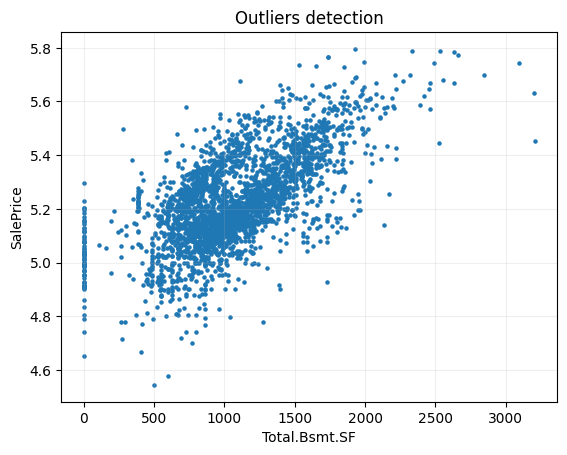

In [1076]:
import matplotlib.pyplot as plt

plt.scatter(model_data['Total.Bsmt.SF'], model_data['SalePrice'], s=5)
plt.title("Outliers detection")
plt.xlabel("Total.Bsmt.SF")
plt.ylabel("SalePrice")
plt.grid(alpha=0.2)
plt.show()


In [1077]:
corr = model_data.corr()
corr.sort_values(["SalePrice"], ascending = True, inplace = True)
print(corr.SalePrice[0:6])

Exter.Qual     -0.690053
Kitchen.Qual   -0.669814
House.Age      -0.614129
Remod.Age      -0.585283
Garage.Age     -0.551220
Heating.QC     -0.490608
Name: SalePrice, dtype: float64


## Outiliers detection Exter.Qual

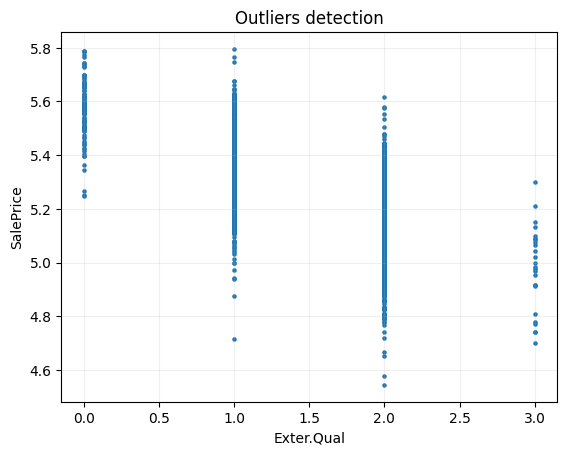

In [1078]:
import matplotlib.pyplot as plt

plt.scatter(model_data['Exter.Qual'], model_data['SalePrice'], s=5)
plt.title("Outliers detection")
plt.xlabel("Exter.Qual")
plt.ylabel("SalePrice")
plt.grid(alpha=0.2)
plt.show()


No outliers detected

## Outiliers detection Kitchen.Qual

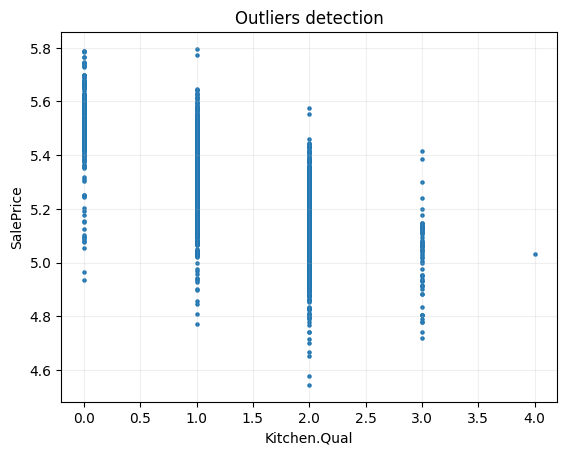

In [1079]:
import matplotlib.pyplot as plt

plt.scatter(model_data['Kitchen.Qual'], model_data['SalePrice'], s=5)
plt.title("Outliers detection")
plt.xlabel("Kitchen.Qual")
plt.ylabel("SalePrice")
plt.grid(alpha=0.2)
plt.show()


Only one observation with 4 score at Kitchen Quality

In [1080]:
model_data = model_data[model_data['Kitchen.Qual'] < 4]

## Outiliers detection House.Age 

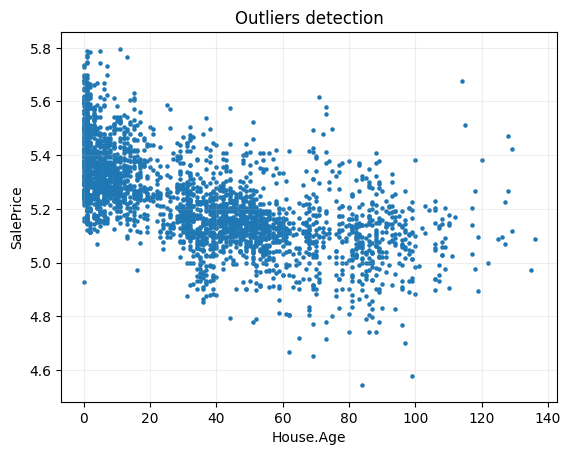

In [1081]:
import matplotlib.pyplot as plt

plt.scatter(model_data['House.Age'], model_data['SalePrice'], s=5)
plt.title("Outliers detection")
plt.xlabel("House.Age")
plt.ylabel("SalePrice")
plt.grid(alpha=0.2)
plt.show()


No outliers detected

## Outiliers detection Remod.Age

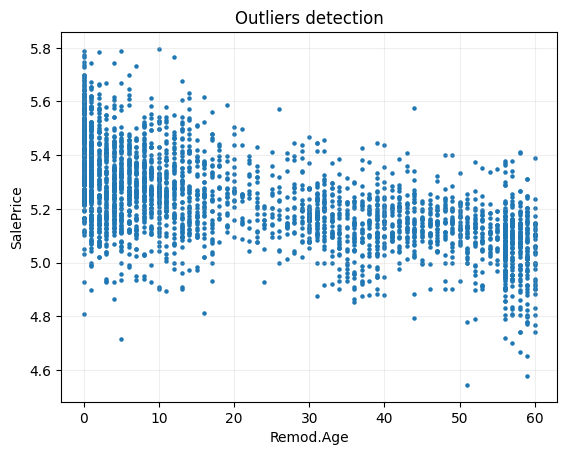

In [1082]:
import matplotlib.pyplot as plt

plt.scatter(model_data['Remod.Age'], model_data['SalePrice'], s=5)
plt.title("Outliers detection")
plt.xlabel("Remod.Age")
plt.ylabel("SalePrice")
plt.grid(alpha=0.2)
plt.show()


No outliers detected

## Outiliers detection Garage.Age 

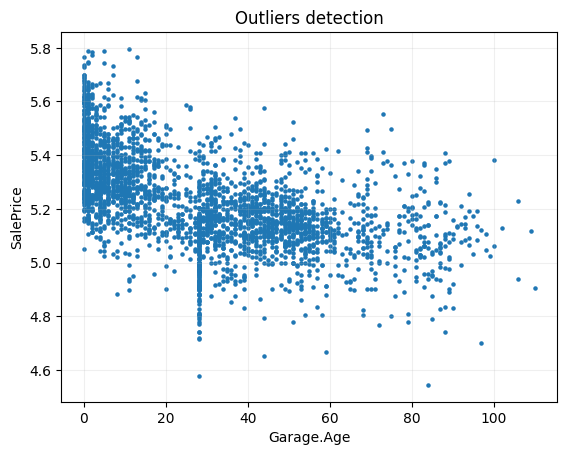

In [1083]:
import matplotlib.pyplot as plt

plt.scatter(model_data['Garage.Age'], model_data['SalePrice'], s=5)
plt.title("Outliers detection")
plt.xlabel("Garage.Age")
plt.ylabel("SalePrice")
plt.grid(alpha=0.2)
plt.show()


No outliers detected

## Outiliers detection Heating.QC 

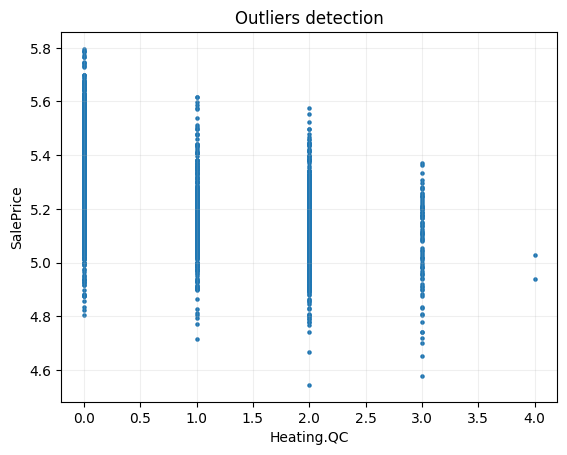

In [1084]:
import matplotlib.pyplot as plt

plt.scatter(model_data['Heating.QC'], model_data['SalePrice'], s=5)
plt.title("Outliers detection")
plt.xlabel("Heating.QC")
plt.ylabel("SalePrice")
plt.grid(alpha=0.2)
plt.show()


Only two observations with 4 score at Heating Quality and condition 

In [1085]:
model_data = model_data[model_data['Heating.QC'] < 4]

# Feature engineering 

Looking at the features (Overall.Qual / Overall.Cond) and (Exter.Qual / Exter.Cond), we thought it would be a good idea to create another feature combining the quality of the material and its condition, because when you buy a house you normally look those features combined, and not separated. 

Score = Quality x Condition



In [1086]:
model_data['Overall.Score'] = model_data['Overall.Qual'] * model_data['Overall.Cond']
model_data['Exter.Score'] = model_data['Exter.Qual'] * model_data['Exter.Cond']

# Train and Test Split

In [1087]:
from sklearn.model_selection import train_test_split

X = model_data.drop(['SalePrice'], axis=1)
y = model_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Polynomial features


Applying Polynomial features, to the features with the most correlation with the target

In [1088]:
corr = model_data.corr()
corr = corr['SalePrice'].apply(abs)
corr.sort_values( ascending = False, inplace = True)
print(corr[1:6])

Overall.Qual    0.826948
Gr.Liv.Area     0.720559
Garage.Cars     0.691029
Exter.Qual      0.689913
Garage.Area     0.671688
Name: SalePrice, dtype: float64


In [1089]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

poly_columns = ['Overall.Qual', 'Gr.Liv.Area', 'Garage.Cars', 'Exter.Qual', 'Garage.Area']


preprocessor = ColumnTransformer(
    transformers=[
        ('poly', PolynomialFeatures(degree=2, include_bias=False), poly_columns),
    ],
    remainder='passthrough')



pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  
])

In [1090]:
pipeline.fit(X_train)

X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Hyperparameter tuning

## Ridge

In [1091]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


ridge = Ridge()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
}

grid_search_ridge = GridSearchCV(
    ridge,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
)

grid_search_ridge.fit(X_train_transformed, y_train)

best_model = grid_search_ridge.best_estimator_

print("Melhor modelo Ridge:", best_model)

ypred = best_model.predict(X_test_transformed)

rmse = np.sqrt(mean_squared_error(y_test, ypred))

erro = error_percent(rmse)

print("Ridge Regression Error: ", erro)

Melhor modelo Ridge: Ridge(alpha=100)
Ridge Regression Error:  10.43%


## Linear Regression

In [1092]:
# MAKE THE IMPORTS
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'n_jobs': [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    
}

grid_search_linreg = GridSearchCV(
    lin_reg,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
)

grid_search_linreg.fit(X_train_transformed, y_train)

best_model = grid_search_linreg.best_estimator_

print("Melhor modelo Linear Regression:", best_model)

ypred = best_model.predict(X_test_transformed)

rmse = np.sqrt(mean_squared_error(y_test, ypred))

erro = error_percent(rmse)

print("Linear Regression Error: ", erro)

Melhor modelo Linear Regression: LinearRegression(fit_intercept=False, n_jobs=-1)
Linear Regression Error:  inf%


C:\Users\leona\AppData\Local\Temp\ipykernel_26556\2555280894.py:2: RuntimeWarning: overflow encountered in scalar power
  return f"{100 * (10**rmse - 1):.2f}%"


## Lasso

In [1093]:
from sklearn.linear_model import Lasso

lasso = Lasso()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
}

grid_search_lasso = GridSearchCV(
    lasso,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
)

grid_search_lasso.fit(X_train_transformed, y_train)

best_model = grid_search_lasso.best_estimator_

print("Melhor modelo Lasso:", best_model)

ypred = best_model.predict(X_test_transformed)

rmse = np.sqrt(mean_squared_error(y_test, ypred))

erro = error_percent(rmse)

print("Lasso Regression Error: ", erro)

Melhor modelo Lasso: Lasso(alpha=0.001)
Lasso Regression Error:  10.57%


## ElasticNet

In [1094]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.001, 0.01, 0.1, 1],
}

grid_search_elastic = GridSearchCV(
    elastic,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
)

grid_search_elastic.fit(X_train_transformed, y_train)

best_model = grid_search_elastic.best_estimator_

print("Melhor modelo ElasticNet:", best_model)

ypred = best_model.predict(X_test_transformed)

rmse = np.sqrt(mean_squared_error(y_test, ypred))

erro = error_percent(rmse)

print("ElasticNet Regression Error: ", erro)

c:\Users\leona\Insper\Machine Learning\ames\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.532e-01, tolerance: 5.051e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\leona\Insper\Machine Learning\ames\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.187e-01, tolerance: 4.683e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\leona\Insper\Machine Learning\ames\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

Melhor modelo ElasticNet: ElasticNet(alpha=0.001, l1_ratio=1)
ElasticNet Regression Error:  10.57%


## TTest

Now we are going to use the TTest to compare the models and see if there is a significant difference between them, and if there is, we will be able to choose the best model.

These are the combinations of models that we are going to compare:

- Ridge x Linear Regression
- Ridge x Lasso
- Ridge x ElasticNet
- Linear Regression x Lasso
- Linear Regression x ElasticNet
- Lasso x ElasticNet


In [1095]:
from scipy.stats import ttest_ind

ridge_scores = grid_search_ridge.cv_results_['mean_test_score']
lasso_scores = grid_search_lasso.cv_results_['mean_test_score']
elastic_scores = grid_search_elastic.cv_results_['mean_test_score']
linreg_scores = grid_search_linreg.cv_results_['mean_test_score']

print("TTest Ridge vs LinReg:\n", ttest_ind(ridge_scores, linreg_scores))
print("\nTTest Ridge vs Lasso:\n", ttest_ind(ridge_scores, lasso_scores))
print("\nTTest Ridge vs Elastic:\n", ttest_ind(ridge_scores, elastic_scores))
print("\nTTest LinReg vs Lasso:\n", ttest_ind(linreg_scores, lasso_scores))
print("\nTTest LinReg vs Elastic:\n", ttest_ind(linreg_scores, elastic_scores))
print("\nTTest Lasso vs Elastic:\n", ttest_ind(lasso_scores, elastic_scores))

TTest Ridge vs LinReg:
 TtestResult(statistic=2.360387377408955, pvalue=0.026037938171877675, df=26.0)

TTest Ridge vs Lasso:
 TtestResult(statistic=3.1292279094718465, pvalue=0.010704545769518676, df=10.0)

TTest Ridge vs Elastic:
 TtestResult(statistic=2.1307281545059955, pvalue=0.04203167683406731, df=28.0)

TTest LinReg vs Lasso:
 TtestResult(statistic=-2.360387377408955, pvalue=0.026037938171877675, df=26.0)

TTest LinReg vs Elastic:
 TtestResult(statistic=-4.791296457029412, pvalue=1.91483607414203e-05, df=44.0)

TTest Lasso vs Elastic:
 TtestResult(statistic=-0.9696129806554747, pvalue=0.34054113005876685, df=28.0)


### Conclusion

After analysing the TTest results, we can see that the Ridge Regression model outperforms the other models in this case, therefore we will consider it as the "best model" for this problem.

Those are the p-values for each comparison:

- Ridge vs. Linear Regression: p-value ≈ 0.026
- Ridge vs. Lasso: p-value ≈ 0.011
- Ridge vs. ElasticNet: p-value ≈ 0.042

Considering that we established a significance level of 0.05, we came to that conclusion due to the fact that in each comparison between the Ridge model and the other models, the p-value was lower than the significance level, which means that we can reject the null hypothesis and accept the alternative hypothesis, that is, the Ridge showed a better performance than the other models.